## Categorical Feature Encoding Challenge

Importing Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import scipy
from sklearn import linear_model, datasets

Load Data

In [2]:
train = pd.read_csv("train.csv",  index_col='id')
test = pd.read_csv("test.csv", index_col = 'id')

In [3]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


Checking for any null values

In [5]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


Number of unique values in each column

In [6]:
test.nunique()

bin_0        2
bin_1        2
bin_2        2
bin_3        2
bin_4        2
nom_0        3
nom_1        6
nom_2        6
nom_3        6
nom_4        4
nom_5      222
nom_6      522
nom_7     1219
nom_8     2214
nom_9    11839
ord_0        3
ord_1        5
ord_2        6
ord_3       15
ord_4       26
ord_5      192
day          7
month       12
dtype: int64

Distribution of the target in Train

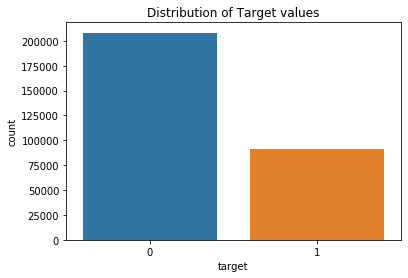

In [7]:
sns.countplot(train['target'])
plt.title("Distribution of Target values")
plt.show()

### Feature Engineering

Encoding binary columns and ordinal columns 

In [8]:
train['bin_4'] = train['bin_4'].map({'Y': 1, 'N': 0})
train['bin_3'] = train['bin_3'].map({'T': 1, 'F': 0})
train['ord_1'] = train['ord_1'].map({'Novice': 0, 'Contributor': 1, 'Expert': 2, 'Master': 3,'Grandmaster': 4})
train['ord_2'] = train['ord_2'].map({'Freezing': 0, 'Cold': 1, 'Warm': 2, 'Hot': 3, 'Boiling Hot': 4, 'Lava Hot': 5})

In [9]:
test['bin_4'] = test['bin_4'].map({'Y': 1, 'N': 0})
test['bin_3'] = test['bin_3'].map({'T': 1, 'F': 0})
test['ord_1'] = test['ord_1'].map({'Novice': 0, 'Contributor': 1, 'Expert': 2, 'Master': 3,'Grandmaster': 4})
test['ord_2'] = test['ord_2'].map({'Freezing': 0, 'Cold': 1, 'Warm': 2, 'Hot': 3, 'Boiling Hot': 4, 'Lava Hot': 5})

In [10]:
l3 = train[train['target'] == 1]['ord_3'].value_counts() / train['ord_3'].value_counts() 
l4 = train[train['target'] == 1]['ord_4'].value_counts() / train['ord_4'].value_counts()
l5 = train[train['target'] == 1]['ord_5'].value_counts() / train['ord_5'].value_counts()

Sorting the valuecounts of the ordinal columns - 'ord_3', 'ord_4' and 'ord_5' based on target

In [11]:
def sorted_ord(col_name,ratio):
    s_ratio = ratio.sort_values()
    keys = list(s_ratio.keys())
    train[col_name] = train[col_name].apply(lambda x : keys.index(x))
    test[col_name] = test[col_name].apply(lambda x : keys.index(x))

sorted_ord('ord_3',l3)
sorted_ord('ord_4',l4)
sorted_ord('ord_5',l5)

In [12]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,4,1,7,2,156,2,2,0
1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,4,3,0,0,99,7,8,0
2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,2,5,7,17,24,7,2,0
3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,4,4,8,2,133,2,1,1
4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,4,0,0,17,158,7,8,0


One Hot Encoding the Nominal features along with day and month

In [13]:
nom_col = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4','nom_5','nom_6','nom_7','nom_8','nom_9','day','month']
nom_train = train[nom_col].astype(str)
nom_test = test[nom_col].astype(str)

ohc_test = pd.get_dummies(nom_test, sparse = True)
ohc_train = pd.get_dummies(nom_train, sparse = True)

In [14]:
ohc_test.dtypes

nom_0_Blue       Sparse[uint8, 0]
nom_0_Green      Sparse[uint8, 0]
nom_0_Red        Sparse[uint8, 0]
nom_1_Circle     Sparse[uint8, 0]
nom_1_Polygon    Sparse[uint8, 0]
                       ...       
month_5          Sparse[uint8, 0]
month_6          Sparse[uint8, 0]
month_7          Sparse[uint8, 0]
month_8          Sparse[uint8, 0]
month_9          Sparse[uint8, 0]
Length: 16060, dtype: object

In [15]:
ohc_train

,nom_0_Blue,nom_0_Green,nom_0_Red,nom_1_Circle,nom_1_Polygon,nom_1_Square,nom_1_Star,nom_1_Trapezoid,nom_1_Triangle,nom_2_Axolotl,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
299996,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
299997,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Dropping feature columns not common in Train and test

In [16]:
unique_test = list(set(ohc_test.columns) - set(ohc_train.columns))
unique_train = list(set(ohc_train.columns) - set(ohc_test.columns))

print("Unique test columns: ", len(unique_test))
print("Unique Train columns: ",len(unique_train))

#Drop all extra test cols, cant learn anything
print(len(ohc_test.columns))

ohc_test_final = ohc_test.drop(unique_test, axis = 1)

print(len(ohc_test_final.columns))

#Drop all extra train cols, doesnt matter for test
print(len(ohc_train.columns))

ohc_train_final = ohc_train.drop(unique_train, axis = 1)

print(len(ohc_train_final.columns))



Unique test columns:  91
Unique Train columns:  235
16060
15969
16204
15969


Reshaping the dataframe to Sparse matrices for faster processing

In [17]:
dropped_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4','nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9','day','month','target']
final_df = train.drop(dropped_cols, axis =1)
target_train = train['target']

dropped_cols_test = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4','nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9','day','month']
test_df = test.drop(dropped_cols_test, axis=1)

import scipy
df = final_df.to_sparse()
df1 = test_df.to_sparse()

df
df=df.to_coo()
df=df.tocsr()

df1
df1=df1.to_coo()
df1=df1.tocsr()

final_dataset = scipy.sparse.hstack([df,ohc_train_final])
final_test = scipy.sparse.hstack([df1,ohc_test_final])


C:\Users\roshn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  if __name__ == '__main__':
C:\Users\roshn\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
C:\Users\roshn\Anaconda3\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)


Logistic Regression Model

In [ ]:
C = np.arange(0.10, 0.13, 0.01)

lr = LogisticRegression()

max_iter = [10000]

hyperparameters = dict(C=C, max_iter = max_iter)

clf = GridSearchCV(lr, hyperparameters, cv=10, verbose=0)

best_model = clf.fit(final_dataset,target_train)

C:\Users\roshn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
print('Best C:', best_model.best_estimator_.get_params()['C'])

Making Predictions

In [ ]:
predictions = best_model.predict_proba(final_test)

In [ ]:
predictions

In [ ]:
samplesub = pd.read_csv('sample_submission.csv', index_col='id')

output = pd.DataFrame({'Id': samplesub.index, 'target': predictions[:,-1]})
output.to_csv('submission.csv', index=False)